## Homework 11 - Bonus
### Ziyan Hu

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

Optimized parameters: p = 0.682, lambda = 1.141


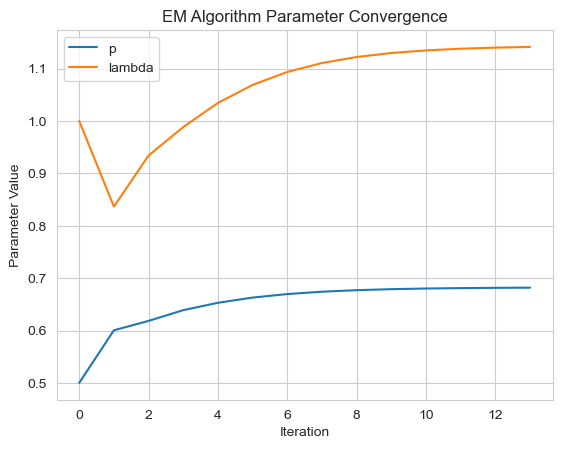

In [12]:
# Data Preparation
y0 = [0]*3062
y1 = [1]*587
y2 = [2]*284
y3 = [3]*103
y4 = [4]*33
y5 = [5]*4
y6 = [6]*2
Y = np.array(sum([y0, y1, y2, y3, y4, y5, y6], []))

# E-step
def e_step(Y, p, lam):
    N = len(Y)
    w = np.zeros(N)

    for i in range(N):
        if Y[i] == 0:
            w[i] = p / (p + (1 - p) * poisson.pmf(0, lam))
        else:
            w[i] = (1 - p) * poisson.pmf(Y[i], lam) / ((1 - p) * poisson.pmf(Y[i], lam) + p)

    return w

# M-step
def m_step(Y, w):
    p = np.mean(w)
    lam = np.sum(Y * (1 - w)) / np.sum(1 - w)

    return p, lam

# EM Algorithm
def em(Y, p_init=0.5, lam_init=1, max_iter=100, tol=1e-3):
    p, lam = p_init, lam_init
    p_history, lam_history = [p], [lam]

    for _ in range(max_iter):
        w = e_step(Y, p, lam)
        new_p, new_lam = m_step(Y, w)

        if abs(new_p - p) < tol and abs(new_lam - lam) < tol:
            break

        p, lam = new_p, new_lam
        p_history.append(p)
        lam_history.append(lam)

    return p, lam, p_history, lam_history

# Running the EM algorithm
p, lam, p_hist, lam_hist = em(Y)
print(f"Optimized parameters: p = {p:.3f}, lambda = {lam:.3f}")

# Plotting convergence
plt.plot(p_hist, label='p')
plt.plot(lam_hist, label='lambda')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.title("EM Algorithm Parameter Convergence")
plt.show()
